In [1]:
import pyconf

In [2]:
pyconf.formulario

GridspecLayout(children=(Dropdown(description='pos1-posmode', index=3, layout=Layout(grid_area='widget001'), o…

In [11]:
with open('/proyecto/conf.cfg','w') as f:
    for i in pyconf.formulario.children:
        try:
            value = i.value.split(':')[-1]
        except AttributeError:
            value = i.value

        print('{} ={}'.format(i.description,value),file=f)

In [13]:
!cp *o *n /proyecto/

In [9]:
ls /proyecto/

conf.cfg      igm12400.20o  PFD10240.20o  PFD20240.20o
igm12400.20n  PFD10240.20n  PFD20240.20n


In [14]:
import pandas as pd

In [78]:
cat /proyecto/conf.cfg

pos1-posmode =static
pos1-frequency =l1
pos1-soltype =combined
pos1-elmask =10
pos1-snrmask =
pos1-dynamics =on
pos1-tidecorr =on
pos1-ionoopt =off
pos1-tropopt =saas
pos1-sateph =brdc
pos1-exclsats =
pos1-navsys =1:gps
pos2-armode =fix-and-hold
pos2-gloarmode =on
pos2-arthres =5
pos2-arlockcnt =10
pos2-arelmask =20
pos2-aroutcnt =1
pos2-arminfix =30
pos2-elmaskhold =15
pos2-slipthres =0.05
pos2-maxage =30
pos2-rejionno =30
pos2-niter =5
pos2-baselen =0
pos2-basesig =0
out-solformat =llh
out-outhead =on
out-outopt =on
out-timesys =gpst
out-timeform =hms
out-timendec =3
out-degform =deg
out-fieldsep =
out-height =ellipsoidal
out-geoid =internal
out-solstatic =all
out-nmeaintv1 =0
out-nmeaintv2 =0
out-outstat =residual
stats-errratio =100
stats-errphase =0.003
stats-errphaseel =0.003
stats-errphasebl =0
stats-errdoppler =10
stats-stdbias =30
stats-stdiono =0.03
stats-stdtrop =0.3
stats-prnaccelh =0.1
stats-prnaccelv =0.01
stats-prnbias =0.0001
stats-prniono =0.001
stats-prntrop =0.0001
s

In [19]:
!cat /proyecto/salida-kine.txt | grep %

% program   : RTKLIB ver.2.4.3
% inp file  : PFD10240.20o
% inp file  : igm10240.20o
% inp file  : igm10240.20n
% obs start : 2020/01/24 18:35:15.0 GPST (week2089 498915.0s)
% obs end   : 2020/01/24 23:48:15.0 GPST (week2089 517695.0s)
% pos mode  : kinematic
% freqs     : L1
% solution  : combined
% elev mask : 10.0 deg
% dynamics  : off
% tidecorr  : off
% ionos opt : off
% tropo opt : saastamoinen
% ephemeris : broadcast
% amb res   : fix and hold
% val thres : 5.0
% antenna1  :                       ( 0.0000  0.0000  1.3780)
% antenna2  : ASH700936D_M    SNOW  ( 0.0000  0.0000  0.0000)
% ref pos   :-34.572243703 -58.439319328   50.6938
%
% (lat/lon/height=WGS84/ellipsoidal,Q=1:fix,2:float,3:sbas,4:dgps,5:single,6:ppp,ns=# of satellites)
%  GPST                  latitude(deg) longitude(deg)  height(m)   Q  ns   sdn(m)   sde(m)   sdu(m)  sdne(m)  sdeu(m)  sdun(m) age(s)  ratio


In [70]:
cols = ["date","GPST", "latitude", "longitude","height","Q","ns","sdn","sde","sdu","sdne","sdeu","sdun","age","ratio"]
kine = pd.read_fwf('/proyecto/salida-kine2.txt',comment='%',names=cols,index=None)
stat = pd.read_fwf('/proyecto/salida-staic2.txt',comment='%',names=cols,index=None)

In [71]:
DEG2RAD = 3.14159 / 180

kinematic:-34.954150633000005 , static:-34.954150707


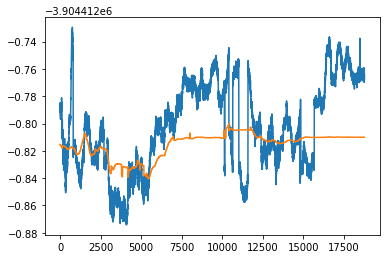

In [72]:
(kine.latitude * DEG2RAD * 6.4e6).plot()
(stat.latitude * DEG2RAD * 6.4e6).plot()
print('kinematic:{} , static:{}'.format(kine.latitude.median(),stat.latitude.median()))

In [74]:
from math import cos

<AxesSubplot:>

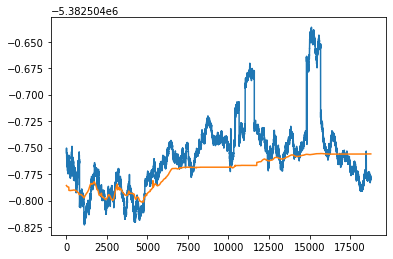

In [75]:
reflat = kine.latitude.median()
cosreflat = cos(reflat * DEG2RAD)

(kine.longitude * DEG2RAD * cosreflat * 6.4e6).plot()
(stat.longitude * DEG2RAD * cosreflat * 6.4e6).plot()

<AxesSubplot:>

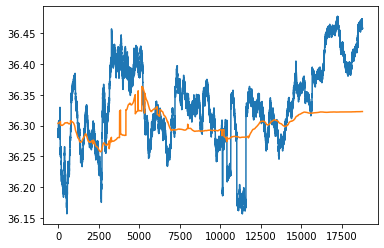

In [76]:
kine.height.plot()
stat.height.plot()

In [77]:
print(kine.iloc[:len(kine)//2].height.median())
print(stat.iloc[:len(stat)//2].height.median())
print(kine.iloc[len(kine)//2:].height.median())
print(stat.iloc[len(stat)//2:].height.median())

36.3231
36.2935
36.3377
36.3073
